In [21]:
import pyportlib
pyportlib.set_client_dir()

update = False
# update = True


## Loading portfolio and benchmark

In [22]:
ptf = pyportlib.Portfolio(account='questrade_tfsa', currency="CAD")
benchmark = pyportlib.Portfolio(account='bench_tfsa', currency='CAD')

q = pyportlib.QuestradeConnection(account_name='tfsa')

2022-04-01 16:49:37,880:ERROR:no market value computed for LGND: in _load_market_value
2022-04-01 16:49:37,911:ERROR:no market value computed for BPY.UN.TO: in _load_market_value


In [23]:
if update:
    q.update_transactions(ptf)
    ptf.update_data(fundamentals_and_dividends=False)
    benchmark.update_data(fundamentals_and_dividends=False)

In [24]:
ptf_rets = ptf.pct_daily_total_pnl(start_date=ptf.start_date, include_cash=False).dropna()
bench_rets = benchmark.pct_daily_total_pnl(start_date=ptf.start_date, include_cash=False).dropna()

2022-04-01 16:49:39,917:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


## Rolling Beta

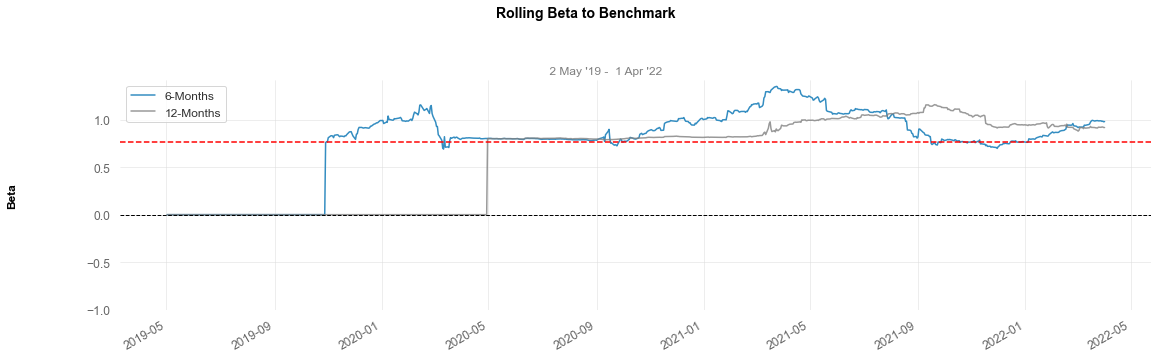

In [25]:
lookback = '4y'
rolling = 126
figsize = (16,5)
pyportlib.plots.rolling_beta(ptf_rets, bench_rets, lookback=lookback, figsize=figsize)

## Rolling Kurtosis

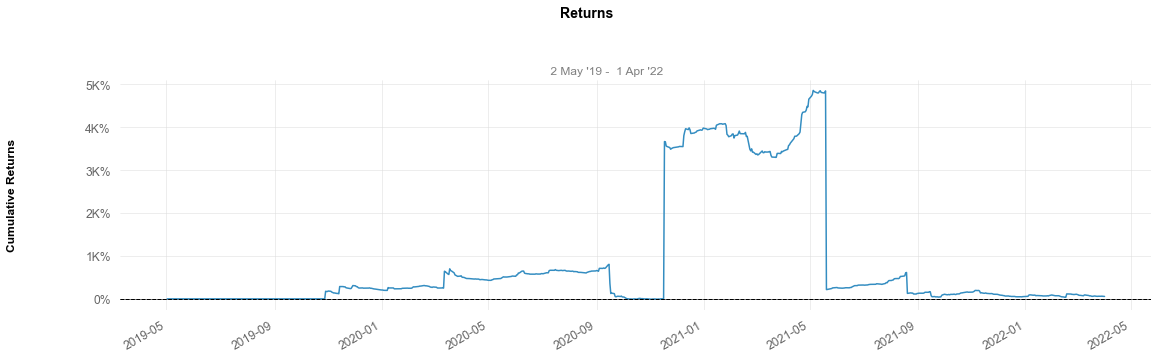

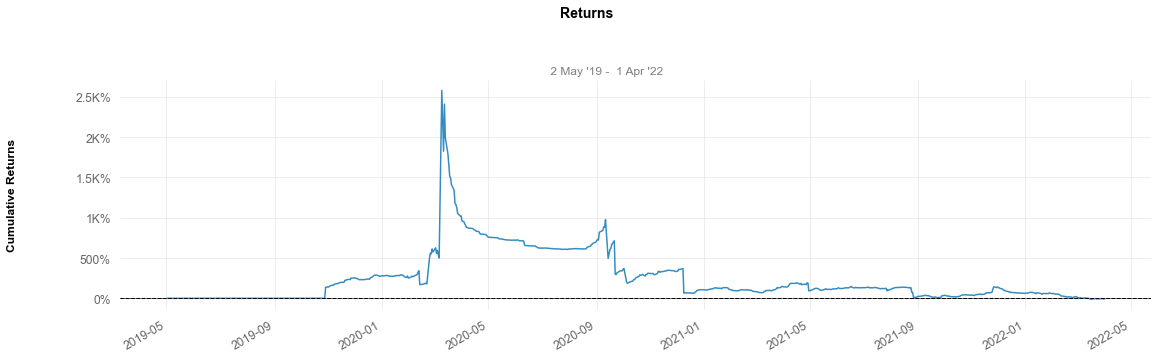

In [26]:
pyportlib.plots.rolling_kurtosis(ptf_rets, lookback=lookback, rolling_period=rolling, figsize=figsize)
pyportlib.plots.rolling_kurtosis(bench_rets, lookback=lookback, rolling_period=rolling, figsize=figsize)

## Rolling Skewness

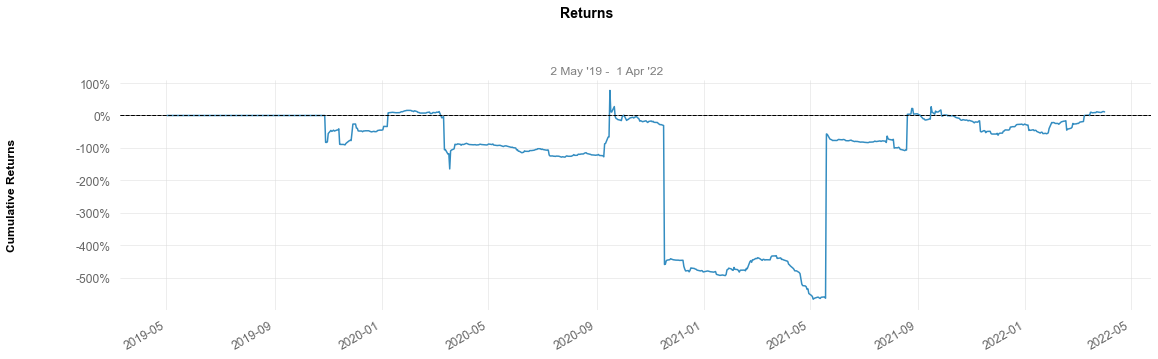

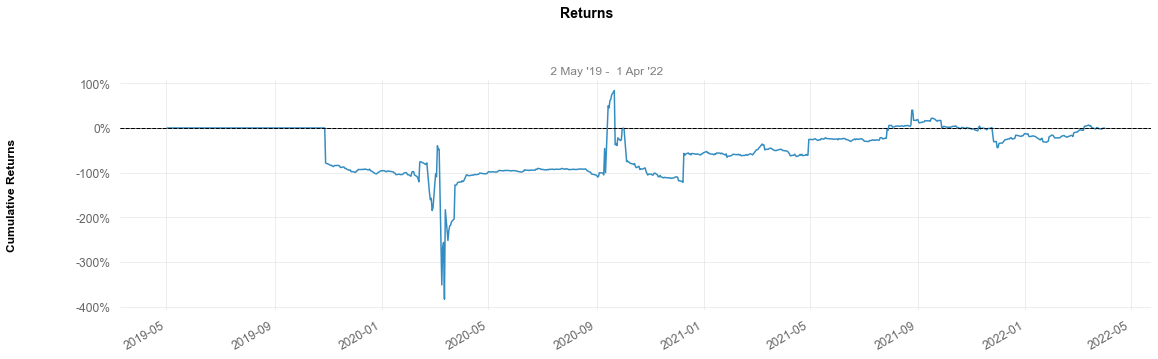

In [27]:
pyportlib.plots.rolling_skew(ptf_rets, lookback=lookback, rolling_period=rolling, figsize=figsize)
pyportlib.plots.rolling_skew(bench_rets, lookback=lookback, rolling_period=rolling, figsize=figsize)

## Rolling Annualized Volatility

2022-04-01 16:49:43,014:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


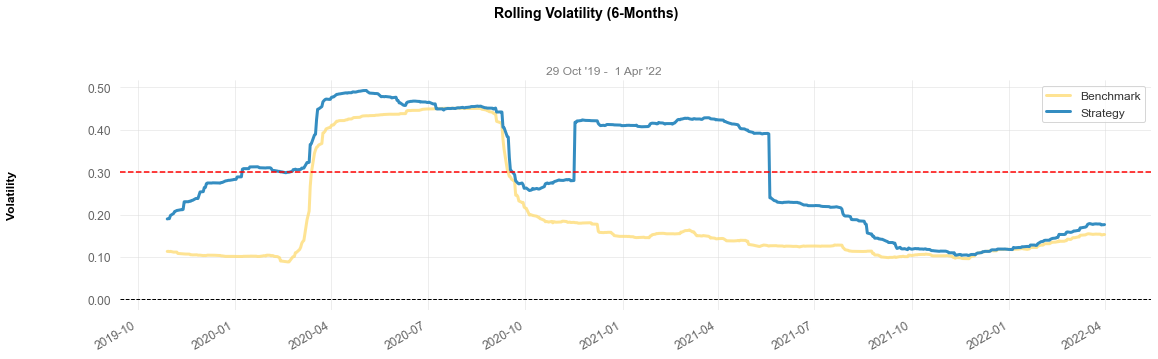

In [28]:
pyportlib.plots.rolling_vol(ptf, lookback=lookback, benchmark=benchmark, figsize=figsize, lw=3)

## Per Position Volatility
#### of every position ever traded in portfolio

VOOV


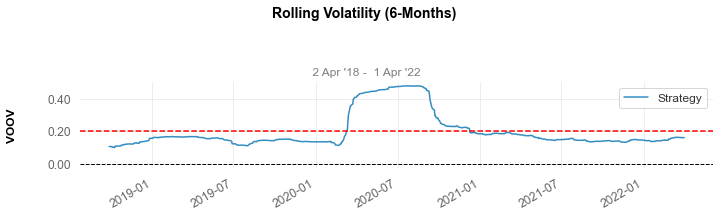

LIT


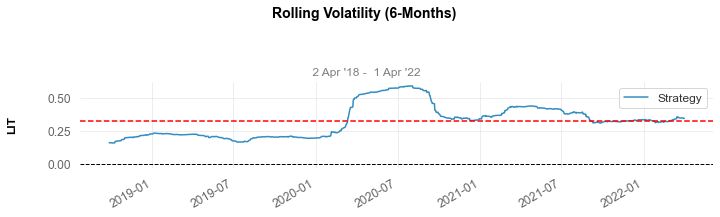

FOOD.TO


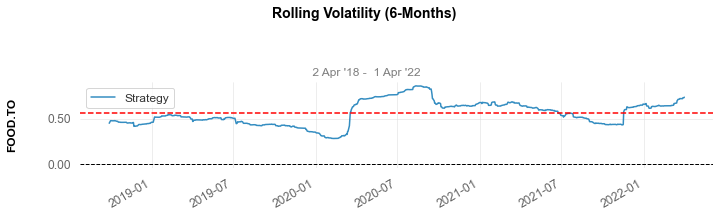

SCYX


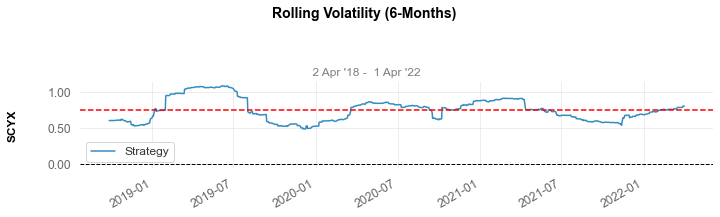

XIU.TO


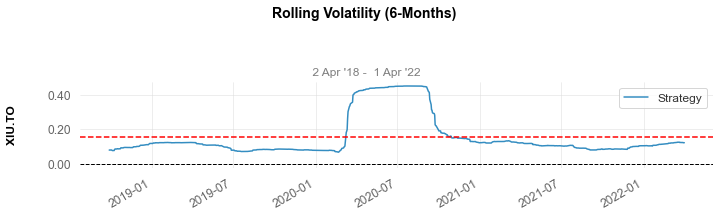

VOO


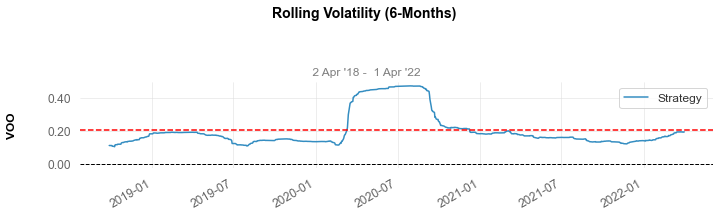

KBWY


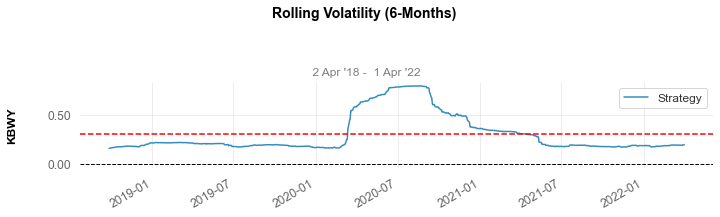

AQN


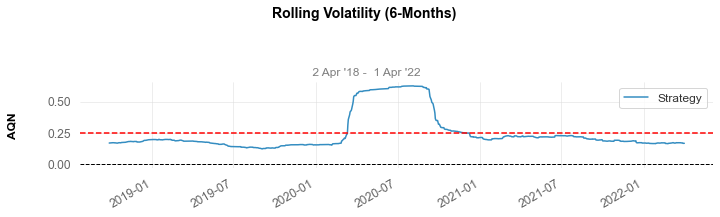

BNS.TO


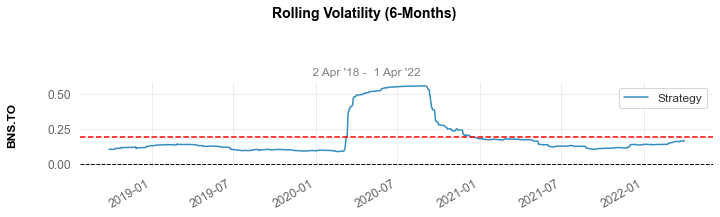

SH


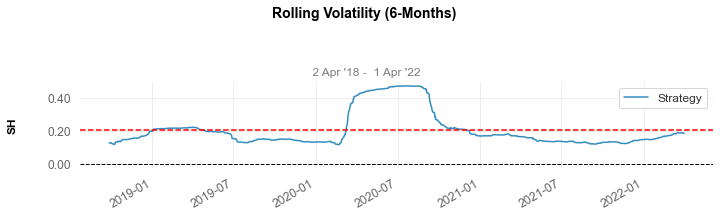

VNQ


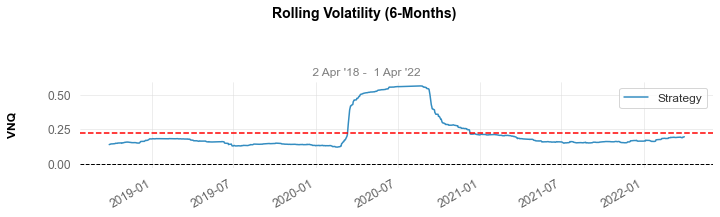

MFC.TO


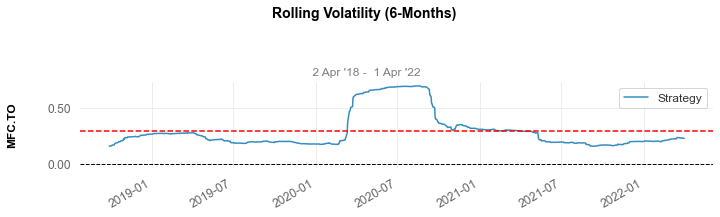

NA.TO


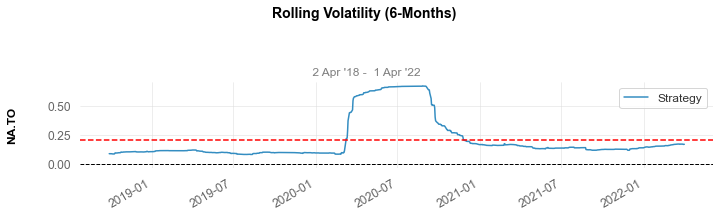

MSFT


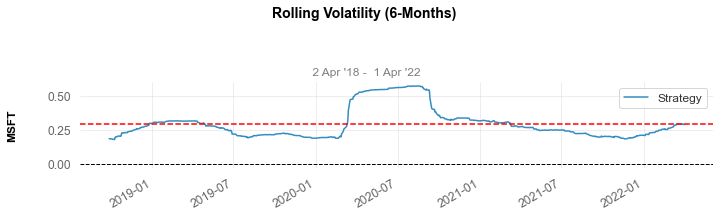

AQN.TO


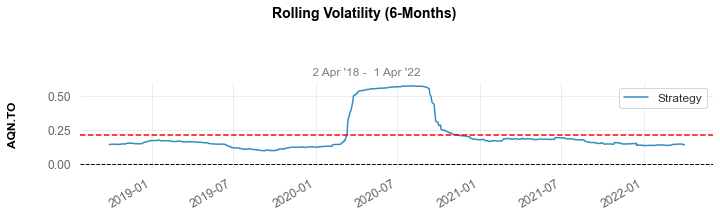

MRK


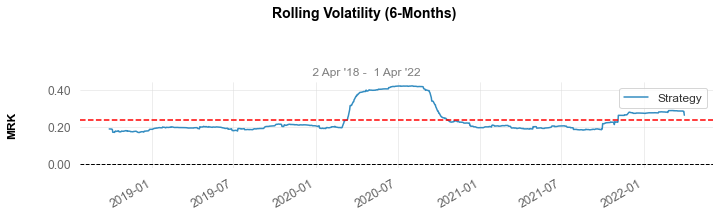

IBB


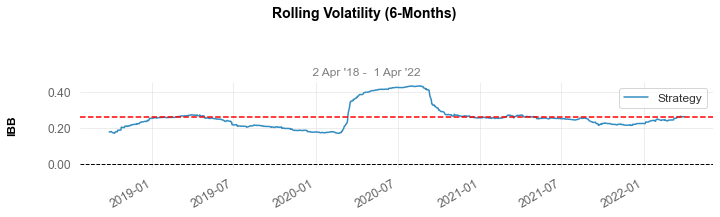

PLTR


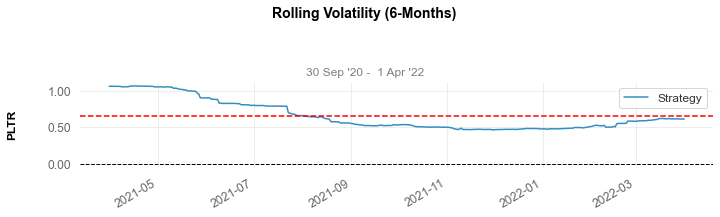

BGCP


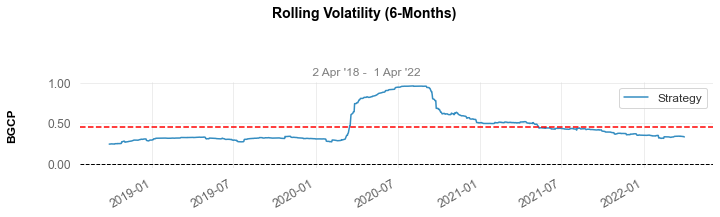

ISTB


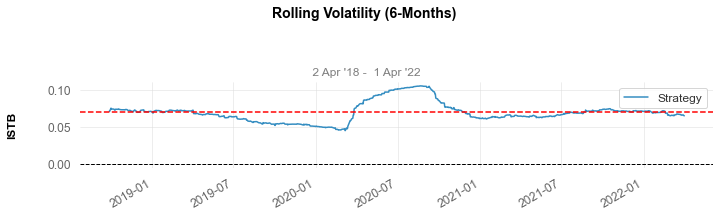

PFE


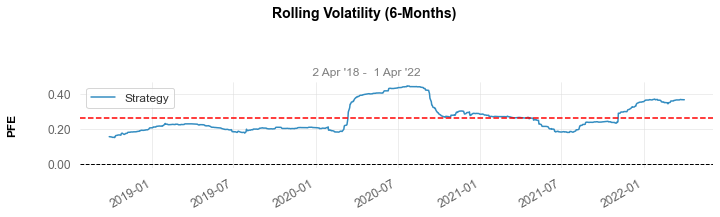

CLDX


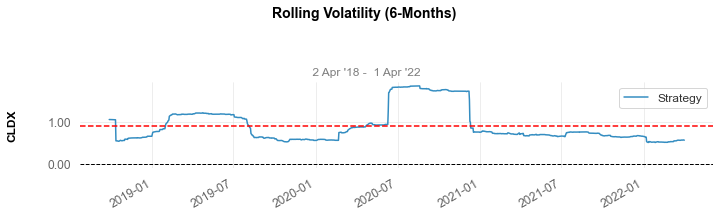

GRT.UN.TO


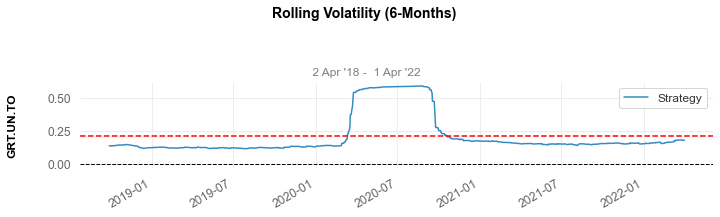

ABT


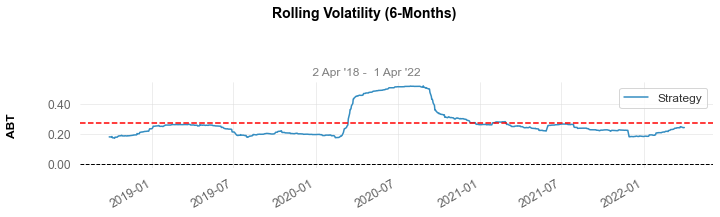

NOU.VN


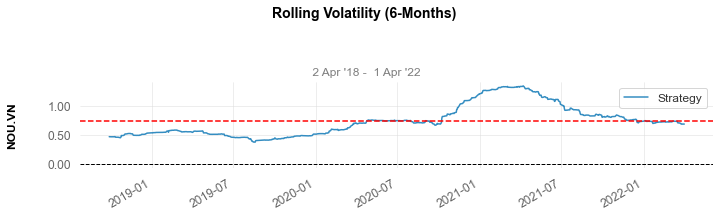

VO


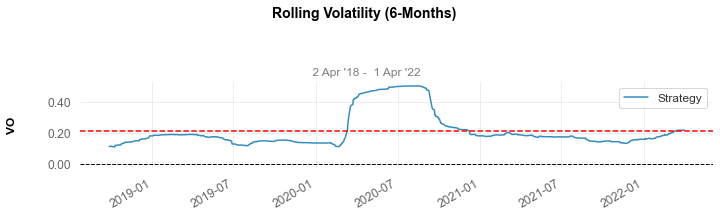

LPTX


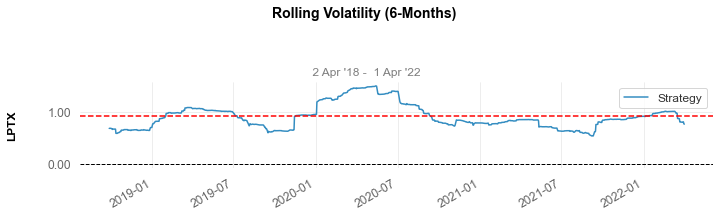

VDY.TO


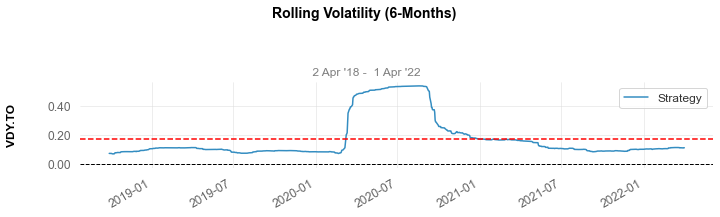

LQD


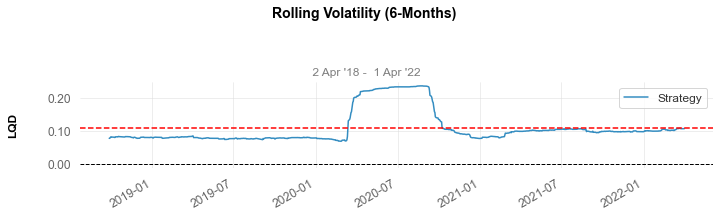

VAB.TO


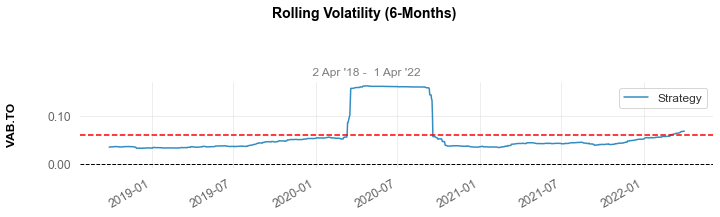

EXEL


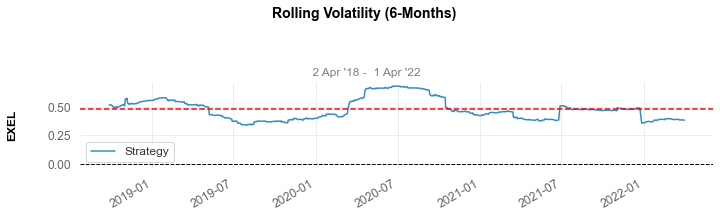

KBWD


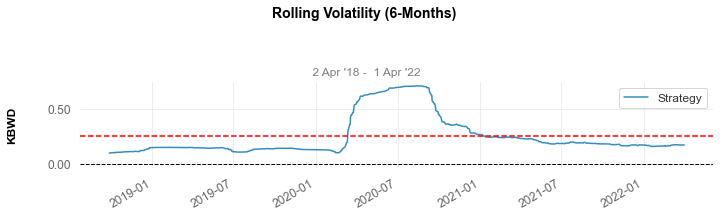

FSZ.TO


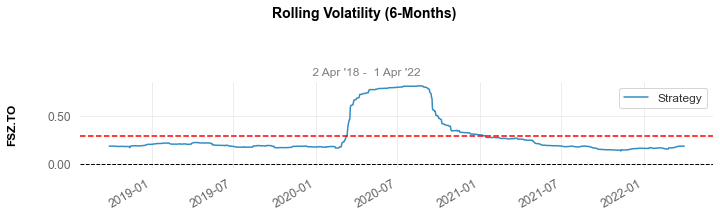

TD.TO


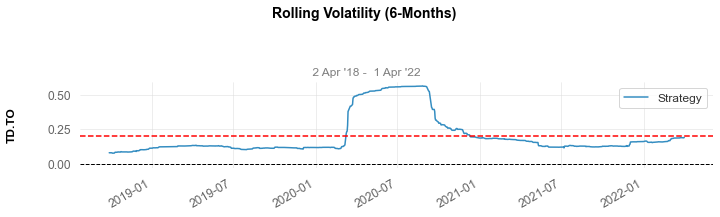

LGND


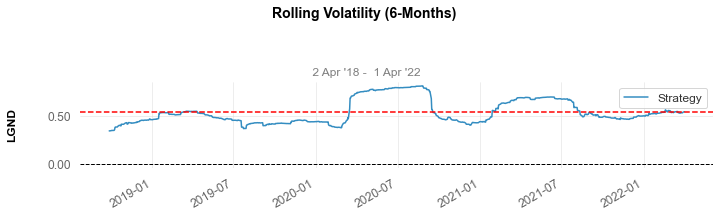

BTCC.B.TO


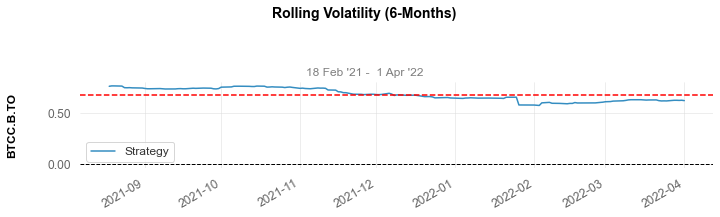

ARKF


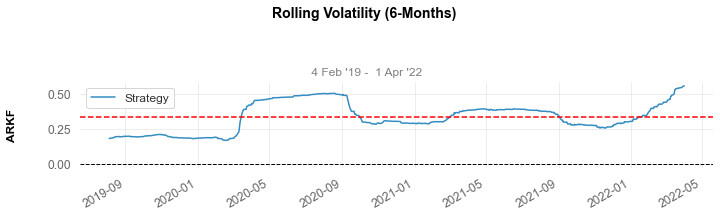

XDV.TO


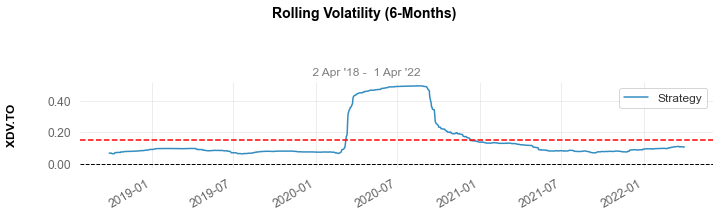

BIP.UN.TO


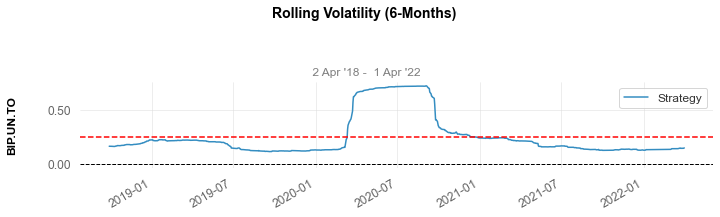

CLVS


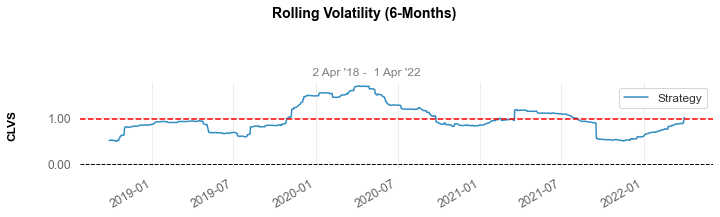

OUSA


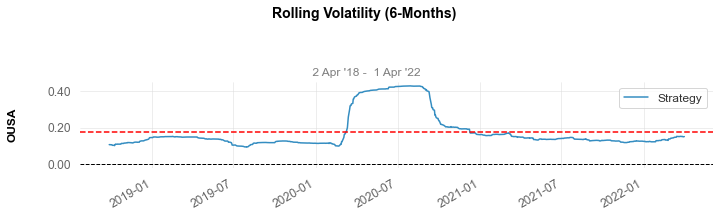

SLV


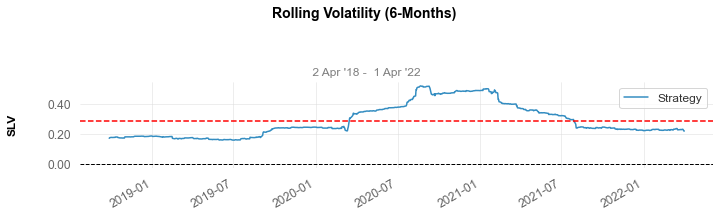

SLRC


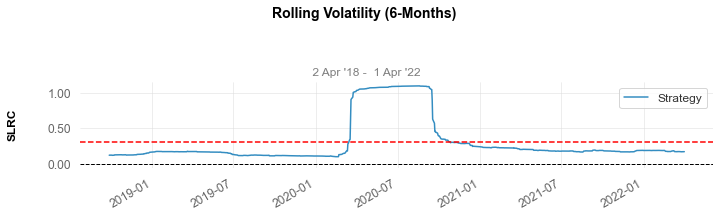

T.TO


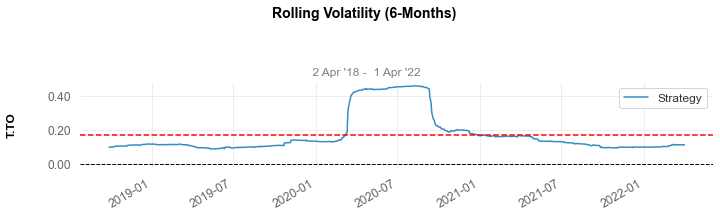

GME


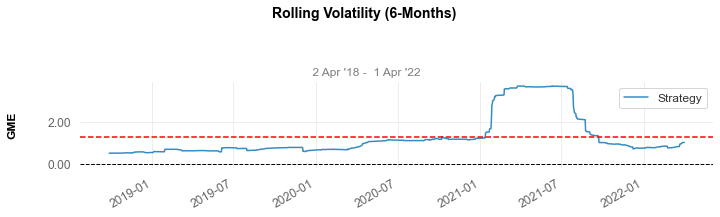

HTGC


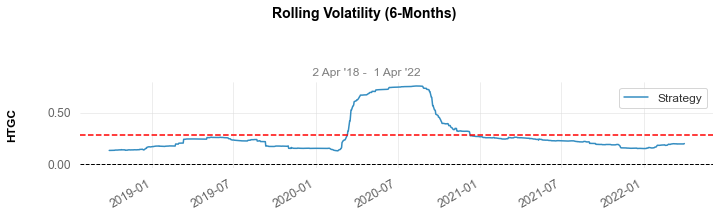

SKYY


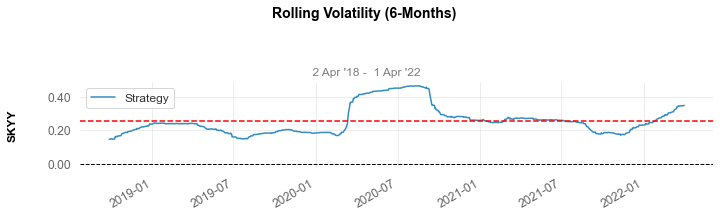

PPL.TO


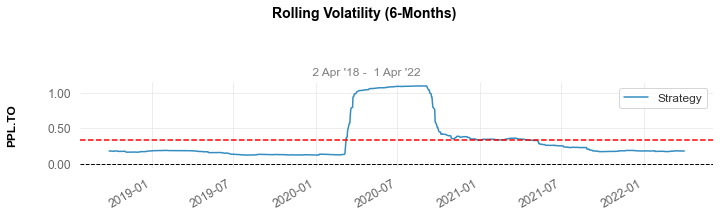

BPY.UN.TO
TCPC


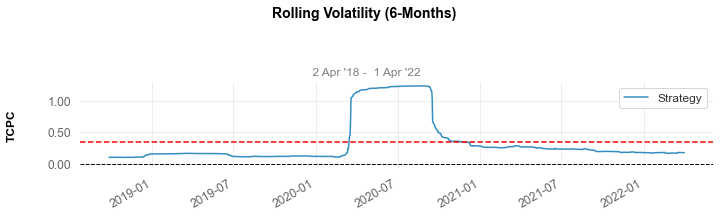

VBU.TO


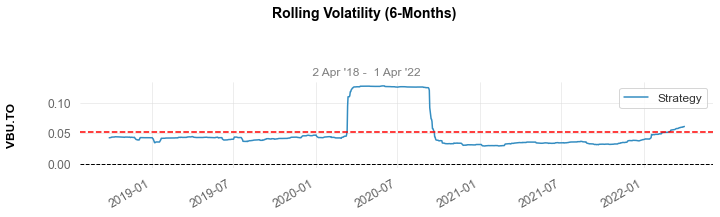

TM


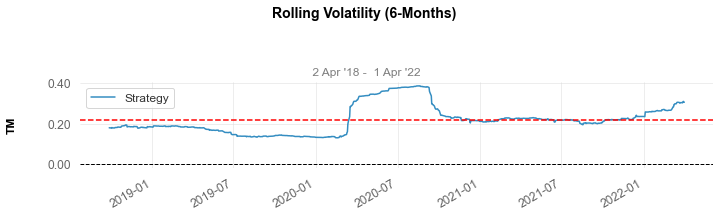

SRU.UN.TO


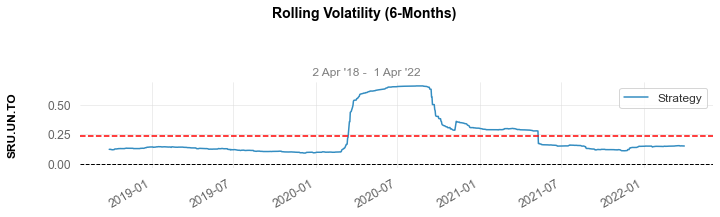

AAPL


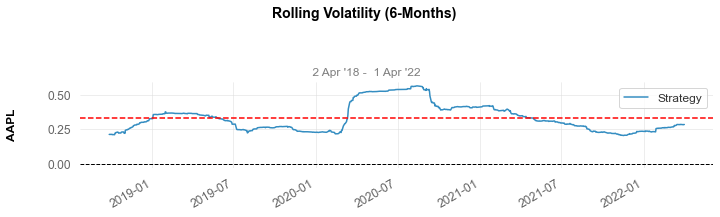

CDZ.TO


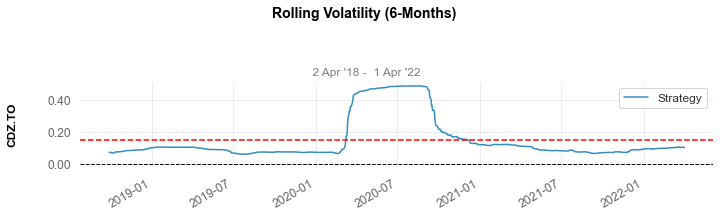

FLT.VN


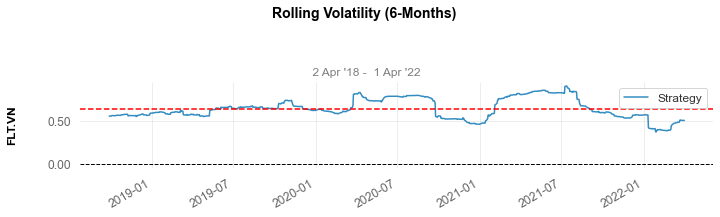

BCLI


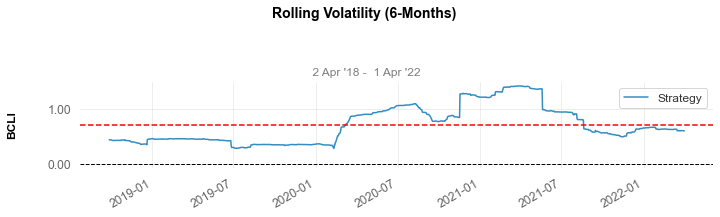

ZJK.TO


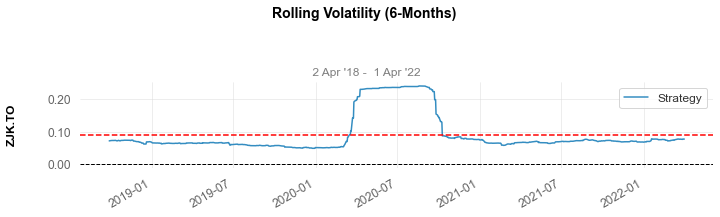

VSB.TO


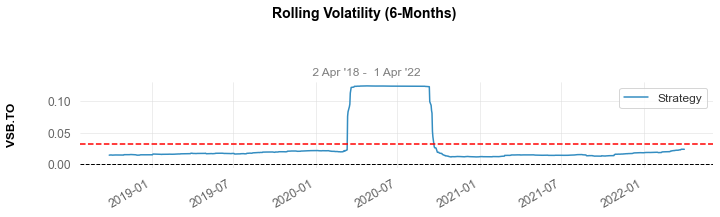

NWH.UN.TO


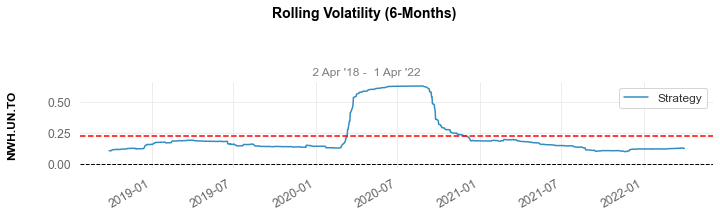

EXAS


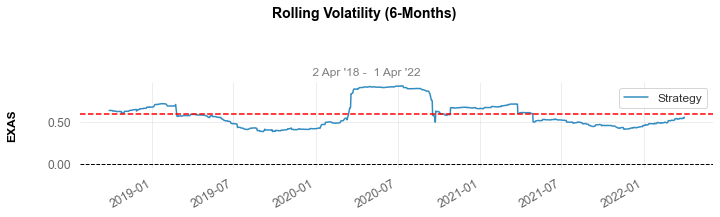

QBR.B.TO


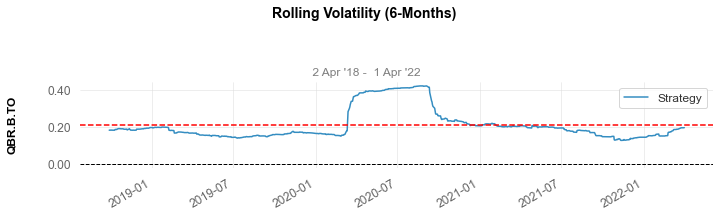

VB


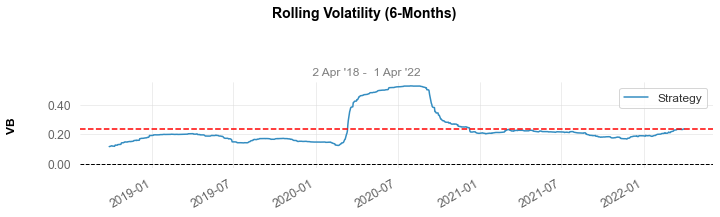

VIRT


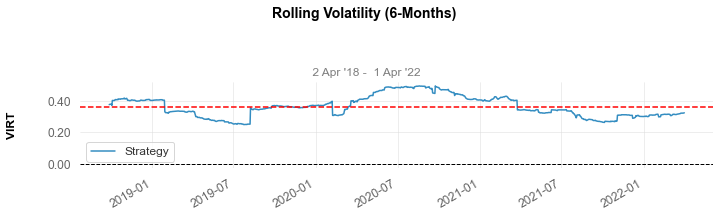

In [35]:
for pos in ptf.positions.values():
    print(pos.ticker)
    if not pos.prices.empty:
        pyportlib.plots.rolling_vol(pos, lookback=lookback, ylabel=pos.ticker)

## All positions historic contribution to portfolio volatility

In [ ]:
# for pos in ptf.positions.values():
#     pond_vol = (rolling_vol[pos.ticker] * pos.quantities * pos.prices)
#     pond_vol.name = pos.ticker
#     pond_vol.plot(legend=True, figsize=figsize)

## Correlations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(11,11))
sns.heatmap(pyportlib.stats.cluster_corr(ptf.corr()))